In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading in original data

In [37]:
og_train_df = pd.read_csv('train.csv')
og_test_df = pd.read_csv('test.csv')

og_train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [38]:
og_test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [39]:
meal_df = pd.read_csv('meal_info.csv')
meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [40]:
center_df = pd.read_csv('fulfilment_center_info.csv')
center_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


## Merging data to create new data sets

In [41]:
new_train_df = pd.merge(og_train_df,meal_df,on='meal_id',how='inner')
new_train_df = pd.merge(new_train_df,center_df,on='center_id',how='inner')
print("Shape of new train dataframe:",new_train_df.shape)
print("Missing values in new train dataframe:\n",new_train_df.isnull().sum())
new_train_df.head()

Shape of new train dataframe: (456548, 15)
Missing values in new train dataframe:
 id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [42]:
new_test_df = pd.merge(og_test_df,meal_df,on='meal_id',how='inner')
new_test_df = pd.merge(new_test_df,center_df,on='center_id',how='inner')
print("Shape of new train dataframe:",new_test_df.shape)
print("Missing values in new test dataframe:\n",new_test_df.isnull().sum())
new_test_df.head()

Shape of new train dataframe: (32573, 14)
Missing values in new test dataframe:
 id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [43]:
new_train_df.drop('num_orders',axis=1).columns == new_test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

So, both the dataframe structures are similar for train and test

## EDA:

Exploratory Data Analysis conducted on the new merged train data set

<AxesSubplot:ylabel='num_orders'>

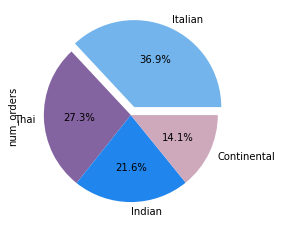

In [44]:
# Displaying the cuisines with most orders
new_train_df.groupby('cuisine')['num_orders'].sum().sort_values(ascending=False).plot.pie(explode=(0.1,0,0,0),colors=['#72b4eb','#8464a0','#2085ec','#cea9bc',],autopct='%1.1f%%')

<AxesSubplot:title={'center':'Most Popular Category of Orders'}, xlabel='category'>

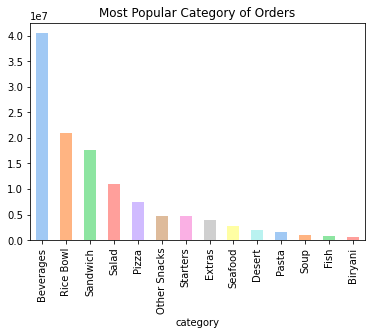

In [45]:
# Displaying the most popular category of orders
new_train_df.groupby('category')['num_orders'].sum().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette('pastel'),title='Most Popular Category of Orders')

In [46]:
# Displaying centers with top 10 average checkout price per order
print("Centers with top 10 average checkout price per order:")
new_train_df.groupby('center_id')['checkout_price'].mean().sort_values(ascending=False)[:10]

Centers with top 10 average checkout price per order:


center_id
34     347.856483
68     345.429941
65     345.176067
83     344.908958
143    344.764757
66     344.476706
32     344.177420
75     343.902557
50     343.836486
146    343.820432
Name: checkout_price, dtype: float64

In [47]:
# cross checking values
new_train_df.loc[new_train_df['center_id']==10,'checkout_price'].mean()

335.61569208838137

<AxesSubplot:title={'center':'Displaying top 10 (city code, region code) for number of orders'}, ylabel='city_code,region_code'>

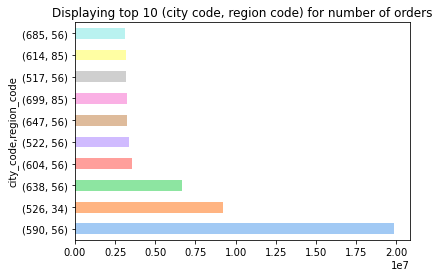

In [48]:
new_train_df.groupby(['city_code','region_code'])['num_orders'].sum().sort_values(ascending=False)[:10].plot(kind='barh',color=sns.color_palette('pastel'),title='Displaying top 10 (city code, region code) for number of orders')

### Basic Preprocessing

In [49]:
new_train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [50]:
new_train_df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [51]:
df1=new_train_df[['week', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code','center_type', 'op_area']] #removing unnecessary columns
df1.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [52]:
#Splitting into X and y
y = df1['num_orders']
X = df1.drop('num_orders',axis=1)

from sklearn.model_selection import train_test_split,GridSearchCV

#Splitting into train and validation sets
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
343260,74,290.03,291.03,0,0,Sandwich,Italian,614,85,TYPE_A,3.0
145850,23,486.03,484.03,0,0,Biryani,Indian,615,34,TYPE_B,4.2
54151,62,445.23,447.23,0,0,Biryani,Indian,461,34,TYPE_A,3.9
231471,37,296.88,295.88,0,0,Rice Bowl,Indian,590,56,TYPE_A,3.9
445928,118,281.30,283.30,0,0,Rice Bowl,Indian,638,56,TYPE_A,7.0


In [54]:
X_train.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code',
       'center_type', 'op_area'],
      dtype='object')

In [55]:
num_cols = ['week', 'checkout_price', 'base_price', 'op_area']
cat_cols = ['emailer_for_promotion','homepage_featured', 'category', 'cuisine', 'city_code', 'region_code','center_type']

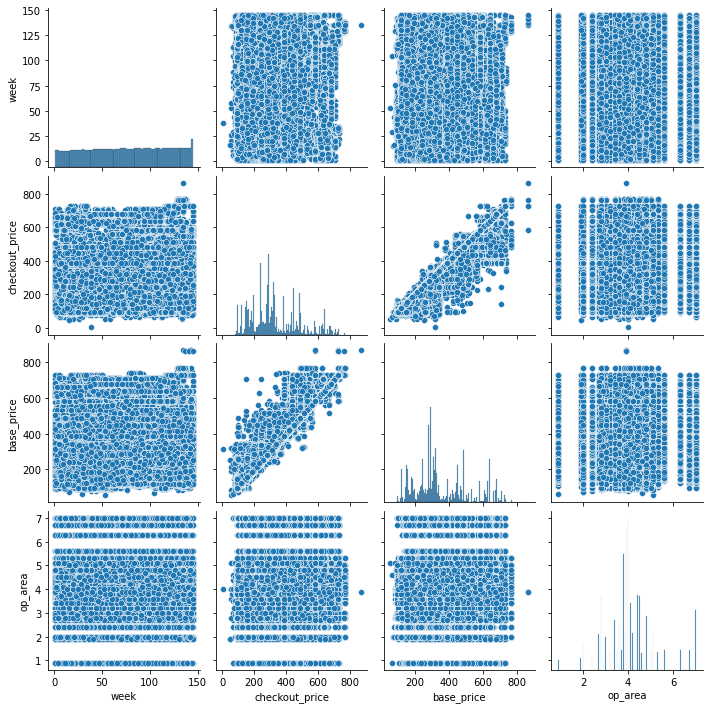

In [56]:
sns.pairplot(X_train[num_cols])

<AxesSubplot:>

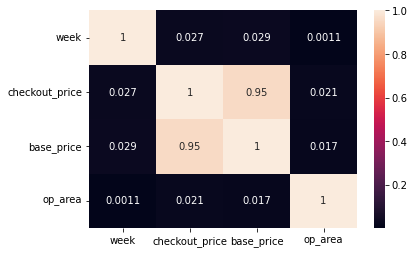

In [57]:
sns.heatmap(X_train[num_cols].corr(),annot=True)

Clearly, checkout_price is very highly correlated with base_price. We can drop this without much loss of information.

In [58]:
X_train = X_train.drop('checkout_price',axis=1)
X_validation = X_validation.drop('checkout_price',axis=1)

X_train.head()

,week,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
343260,74,291.03,0,0,Sandwich,Italian,614,85,TYPE_A,3.0
145850,23,484.03,0,0,Biryani,Indian,615,34,TYPE_B,4.2
54151,62,447.23,0,0,Biryani,Indian,461,34,TYPE_A,3.9
231471,37,295.88,0,0,Rice Bowl,Indian,590,56,TYPE_A,3.9
445928,118,283.30,0,0,Rice Bowl,Indian,638,56,TYPE_A,7.0


### Standard Scaling on Numeric Columns

In [59]:
#Performing standard scaling
from sklearn.preprocessing import StandardScaler

scale_cols = ['base_price','op_area']

scaler = StandardScaler()
scaler.fit(X_train[scale_cols])
X_train[scale_cols] = scaler.transform(X_train[scale_cols])
X_validation[scale_cols] = scaler.transform(X_validation[scale_cols])    

<AxesSubplot:xlabel='op_area', ylabel='Density'>

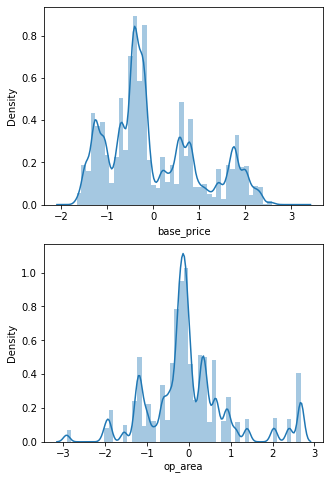

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(5, 8))

sns.distplot(X_train['base_price'],ax=axes[0])
sns.distplot(X_train['op_area'],ax=axes[1])

There does not seem to be any concerning outliers/behavior.

### One-Hot Encoding of Numeric Variables

In [61]:
# Example train and test datasets
#train = pd.DataFrame({'A': ['red', 'blue', 'green', 'red'], 'B': [1, 2, 3, 4]})
#test = pd.DataFrame({'A': ['blue', 'green', 'yellow'], 'B': [5, 6, 7]})

cat_columns = ['emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type']

# Perform One-Hot Encoding on train set
train_encoded = pd.get_dummies(X_train, columns=cat_columns, drop_first=True)

# Perform One-Hot Encoding on test set with same columns as train set
test_encoded = pd.get_dummies(X_validation, columns=cat_columns, drop_first=True)

# Add missing columns from train set to test set with default values
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0

# Reorder columns in test set to match train set
test_encoded = test_encoded[train_encoded.columns]

X_train = train_encoded
X_validation = test_encoded

X_train.head()

,week,base_price,op_area,emailer_for_promotion_1,homepage_featured_1,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,...,city_code_713,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C
343260,74,-0.392179,-0.991848,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
145850,23,0.808572,0.108004,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
54151,62,0.579620,-0.166959,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
231471,37,-0.362005,-0.166959,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
445928,118,-0.440272,2.674327,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Random Forest Model

### Hyperparamter Tuning for LightGBM

In [62]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Create a LightGBM Regressor
lgbm_regressor = LGBMRegressor()

# Define the hyperparameter grid
param_grid = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

# Create GridSearchCV object
grid_search = GridSearchCV(lgbm_regressor, param_grid, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train a LightGBM Regressor with the best hyperparameters
best_regressor = LGBMRegressor(**best_params)
best_regressor.fit(X_train, y_train)

# Make predictions on validation set
y_pred = best_regressor.predict(X_validation)


Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': -1, 'min_child_samples': 10, 'num_leaves': 100, 'reg_alpha': 0}
Best Score: 0.8162815376185804


So the best model is the model with parameters {'learning_rate': 0.2, 'max_depth': -1, 'min_child_samples': 10, 'num_leaves': 100, 'reg_alpha': 0}

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_validation, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_validation, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse**0.5

# Calculate R-squared (R2) score
r2 = r2_score(y_validation, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE) on Validation Set:", mae)
print("Mean Squared Error (MSE) on Validation Set:", mse)
print("Root Mean Squared Error (RMSE) on Validation Set:", rmse)
print("R-squared (R2) score on Validation Set:", r2)

Mean Absolute Error (MAE) on Validation Set: 87.08213570687467
Mean Squared Error (MSE) on Validation Set: 27085.491034005026
Root Mean Squared Error (RMSE) on Validation Set: 164.5767025857701
R-squared (R2) score on Validation Set: 0.821565581556986


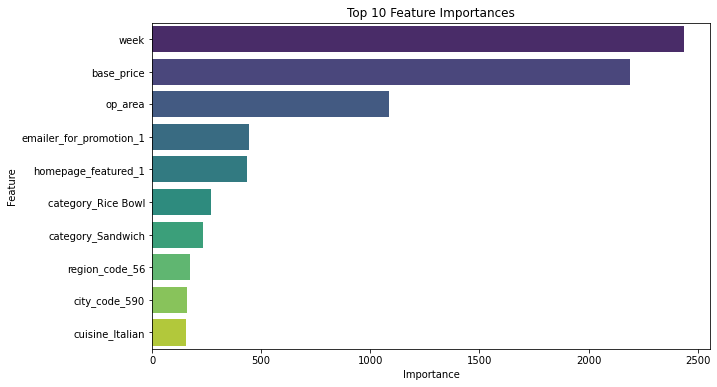

In [64]:
# Get the feature importances
feature_importances = best_regressor.feature_importances_

# Get the top 10 features and their corresponding importances
top_10_features = X_train.columns[np.argsort(feature_importances)[::-1][:10]]
top_10_importances = feature_importances[np.argsort(feature_importances)[::-1][:10]]

# Create a dataframe of top 10 features and importances
top_10_features_df = pd.DataFrame({'Feature': top_10_features, 'Importance': top_10_importances})

# Sort the dataframe by importance
top_10_features_df = top_10_features_df.sort_values(by='Importance', ascending=False)

# Create a barplot of the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features_df, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Applying this model on the Unseen Test Dataset to get performance from Kaggle

In [65]:
# Performing all preprocessing

df1=new_test_df[['week', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category',
       'cuisine', 'city_code', 'region_code','center_type', 'op_area']] #removing unnecessary columns
X_test = df1
X_test = X_test.drop('checkout_price',axis=1)
X_test.head()

,week,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,146,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,147,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,149,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,150,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,151,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [66]:
#Standard Scaling on unseen test dataset
scale_cols = ['base_price','op_area']

X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [67]:
#One-Hot Encoding on unseen test set

cat_columns = ['emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type']


# Perform One-Hot Encoding on test set with same columns as train set
test_encoded = pd.get_dummies(X_test, columns=cat_columns, drop_first=True)

# Add missing columns from train set to test set with default values
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0

# Reorder columns in test set to match train set
test_encoded = test_encoded[train_encoded.columns]

X_test = test_encoded

X_test.head()

,week,base_price,op_area,emailer_for_promotion_1,homepage_featured_1,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,...,city_code_713,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C
0,146,-1.212921,-1.908392,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,147,-1.212921,-1.908392,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,149,-1.218956,-1.908392,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,150,-1.225177,-1.908392,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,151,-1.212921,-1.908392,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Fitting best LightGBM Regressor to this unseen test data

In [68]:
#Fitting on both train and validation sets first
best_regressor.fit(pd.concat([X_train,X_validation]),pd.concat([y_train,y_validation]))

y_pred = best_regressor.predict(X_test)
og_test_df['num_orders'] = y_pred
sample =  og_test_df.loc[:,['id','num_orders']]
sample.to_csv('sample_submission_lightgbm.csv',index=False)